In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow keras matplotlib numpy opencv-python

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:22<00:00, 178MB/s]
100% 2.70G/2.70G [00:22<00:00, 129MB/s]


### **Analyzing Plant Disease Dataset Distribution**

Overall, this code iterates through your plant disease dataset, builds a DataFrame with image paths and labels, counts the occurrences of each disease class, and finally visualizes the class distribution using a bar chart.

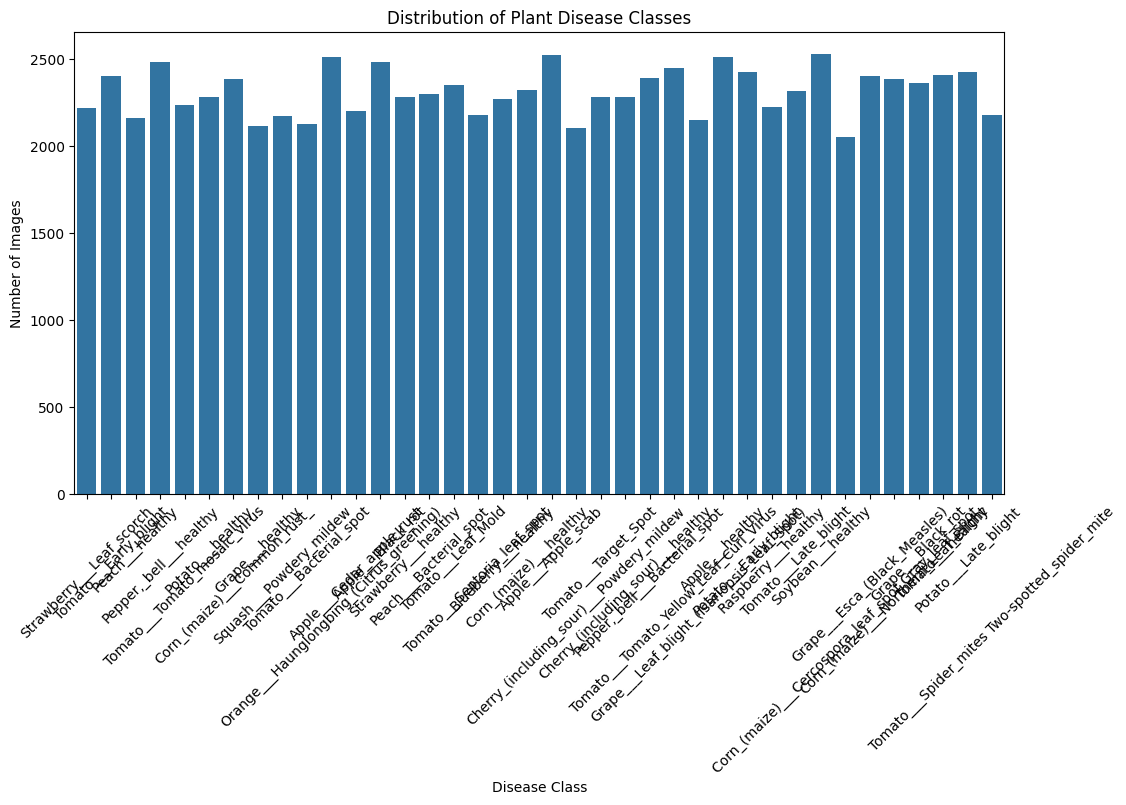

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is unzipped with train and valid subdirectories
base_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

# Create an empty DataFrame to store image paths and labels
data = pd.DataFrame(columns=['image_path', 'label'])

# Iterate through train and valid subdirectories
for subdir in ['train', 'valid']:
    sub_dir = os.path.join(base_dir, subdir)
    for class_name in os.listdir(sub_dir):
        class_path = os.path.join(sub_dir, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Create a dictionary with image path and label
            new_row = {'image_path': image_path, 'label': class_name}

            # Convert the dictionary to a DataFrame and concatenate
            data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

# Count the number of images in each class
class_counts = data['label'].value_counts()

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Plant Disease Classes')
plt.xlabel('Disease Class')
plt.ylabel('Number of Images')
plt.show()
